<a href="https://colab.research.google.com/github/LokeshTiwari004/RegressionInsurance/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing
- ## Loading Dependencies
- ## Loading Dataset

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/train.csv')

# EDA - Preliminary

## Inspecting & Prepairing Dataset

In [4]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [5]:
df.columns = df.columns.map(lambda x: '_'.join(map(lambda y: y.lower(), x.split(' '))))
print(df.shape, df.columns)

(1200000, 21) Index(['id', 'age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')


In [6]:
df.policy_start_date = pd.to_datetime(df.policy_start_date)
df['policy_start_day'] = df['policy_start_date'].map(lambda x: x.day)
df['policy_start_month'] = df['policy_start_date'].map(lambda x: x.month)
df['policy_start_year'] = df['policy_start_date'].map(lambda x: x.year)
df = df.drop(['policy_start_date'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   age                   1181295 non-null  float64
 2   gender                1200000 non-null  object 
 3   annual_income         1155051 non-null  float64
 4   marital_status        1181471 non-null  object 
 5   number_of_dependents  1090328 non-null  float64
 6   education_level       1200000 non-null  object 
 7   occupation            841925 non-null   object 
 8   health_score          1125924 non-null  float64
 9   location              1200000 non-null  object 
 10  policy_type           1200000 non-null  object 
 11  previous_claims       835971 non-null   float64
 12  vehicle_age           1199994 non-null  float64
 13  credit_score          1062118 non-null  float64
 14  insurance_duration    1199999 non-

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.500000,346410.305852,0.000000,299999.750000,599999.500000,899999.250000,1.199999e+06
age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,6.400000e+01
annual_income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,1.499970e+05
number_of_dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000e+00
health_score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,5.897591e+01
previous_claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000e+00
vehicle_age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,1.900000e+01
credit_score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,8.490000e+02
insurance_duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000e+00
premium_amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4.999000e+03


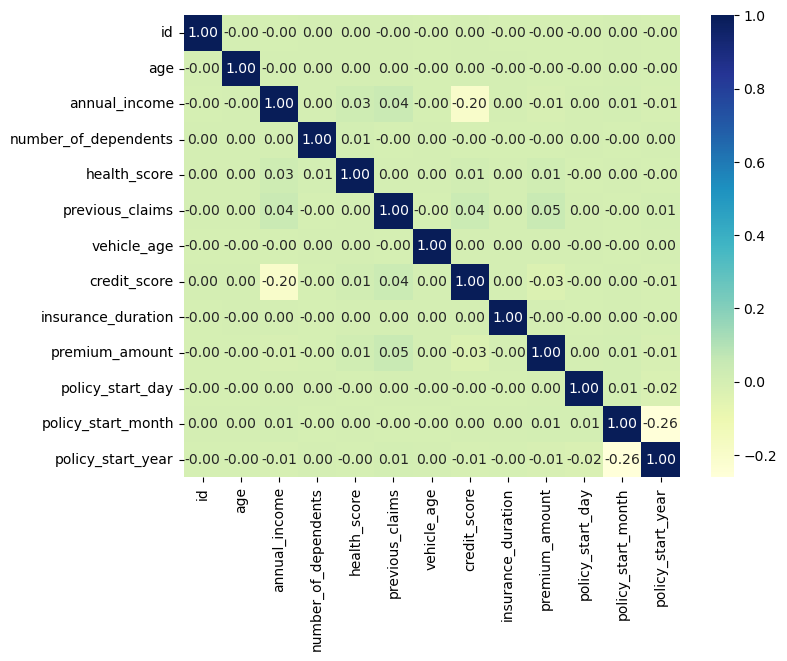

In [9]:
corr_mat = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

## Testing Linear Regression Significance

In [74]:
model = ols("premium_amount ~ age", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         premium_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.976
Date:                Sun, 15 Dec 2024   Prob (F-statistic):            0.00826
Time:                        04:16:45   Log-Likelihood:            -9.6650e+06
No. Observations:             1181295   AIC:                         1.933e+07
Df Residuals:                 1181293   BIC:                         1.933e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1109.0366      2.546    435.568      0.0

In [75]:
for num_feat in corr_mat.columns.drop(['premium_amount', 'id']):
  model = ols(f"premium_amount ~ {num_feat}", data=df).fit()
  pval = model.pvalues[num_feat]
  reg_significant = pval < 0.05
  print(num_feat, f'{pval:.4f}', reg_significant, 'Significant' if reg_significant else 'Insignificant')

age 0.0083 True Significant
annual_income 0.0000 True Significant
number_of_dependents 0.3080 False Insignificant
health_score 0.0000 True Significant
previous_claims 0.0000 True Significant
vehicle_age 0.6685 False Insignificant
credit_score 0.0000 True Significant
insurance_duration 0.9754 False Insignificant
policy_start_day 0.7499 False Insignificant
policy_start_month 0.0000 True Significant
policy_start_year 0.0000 True Significant


## Creating Train and Vaidation Set

In [10]:
train, test = train_test_split(df, test_size=0.25, random_state=1)
print(train.shape, test.shape)

(900000, 23) (300000, 23)


## visualise relation between target and feature.

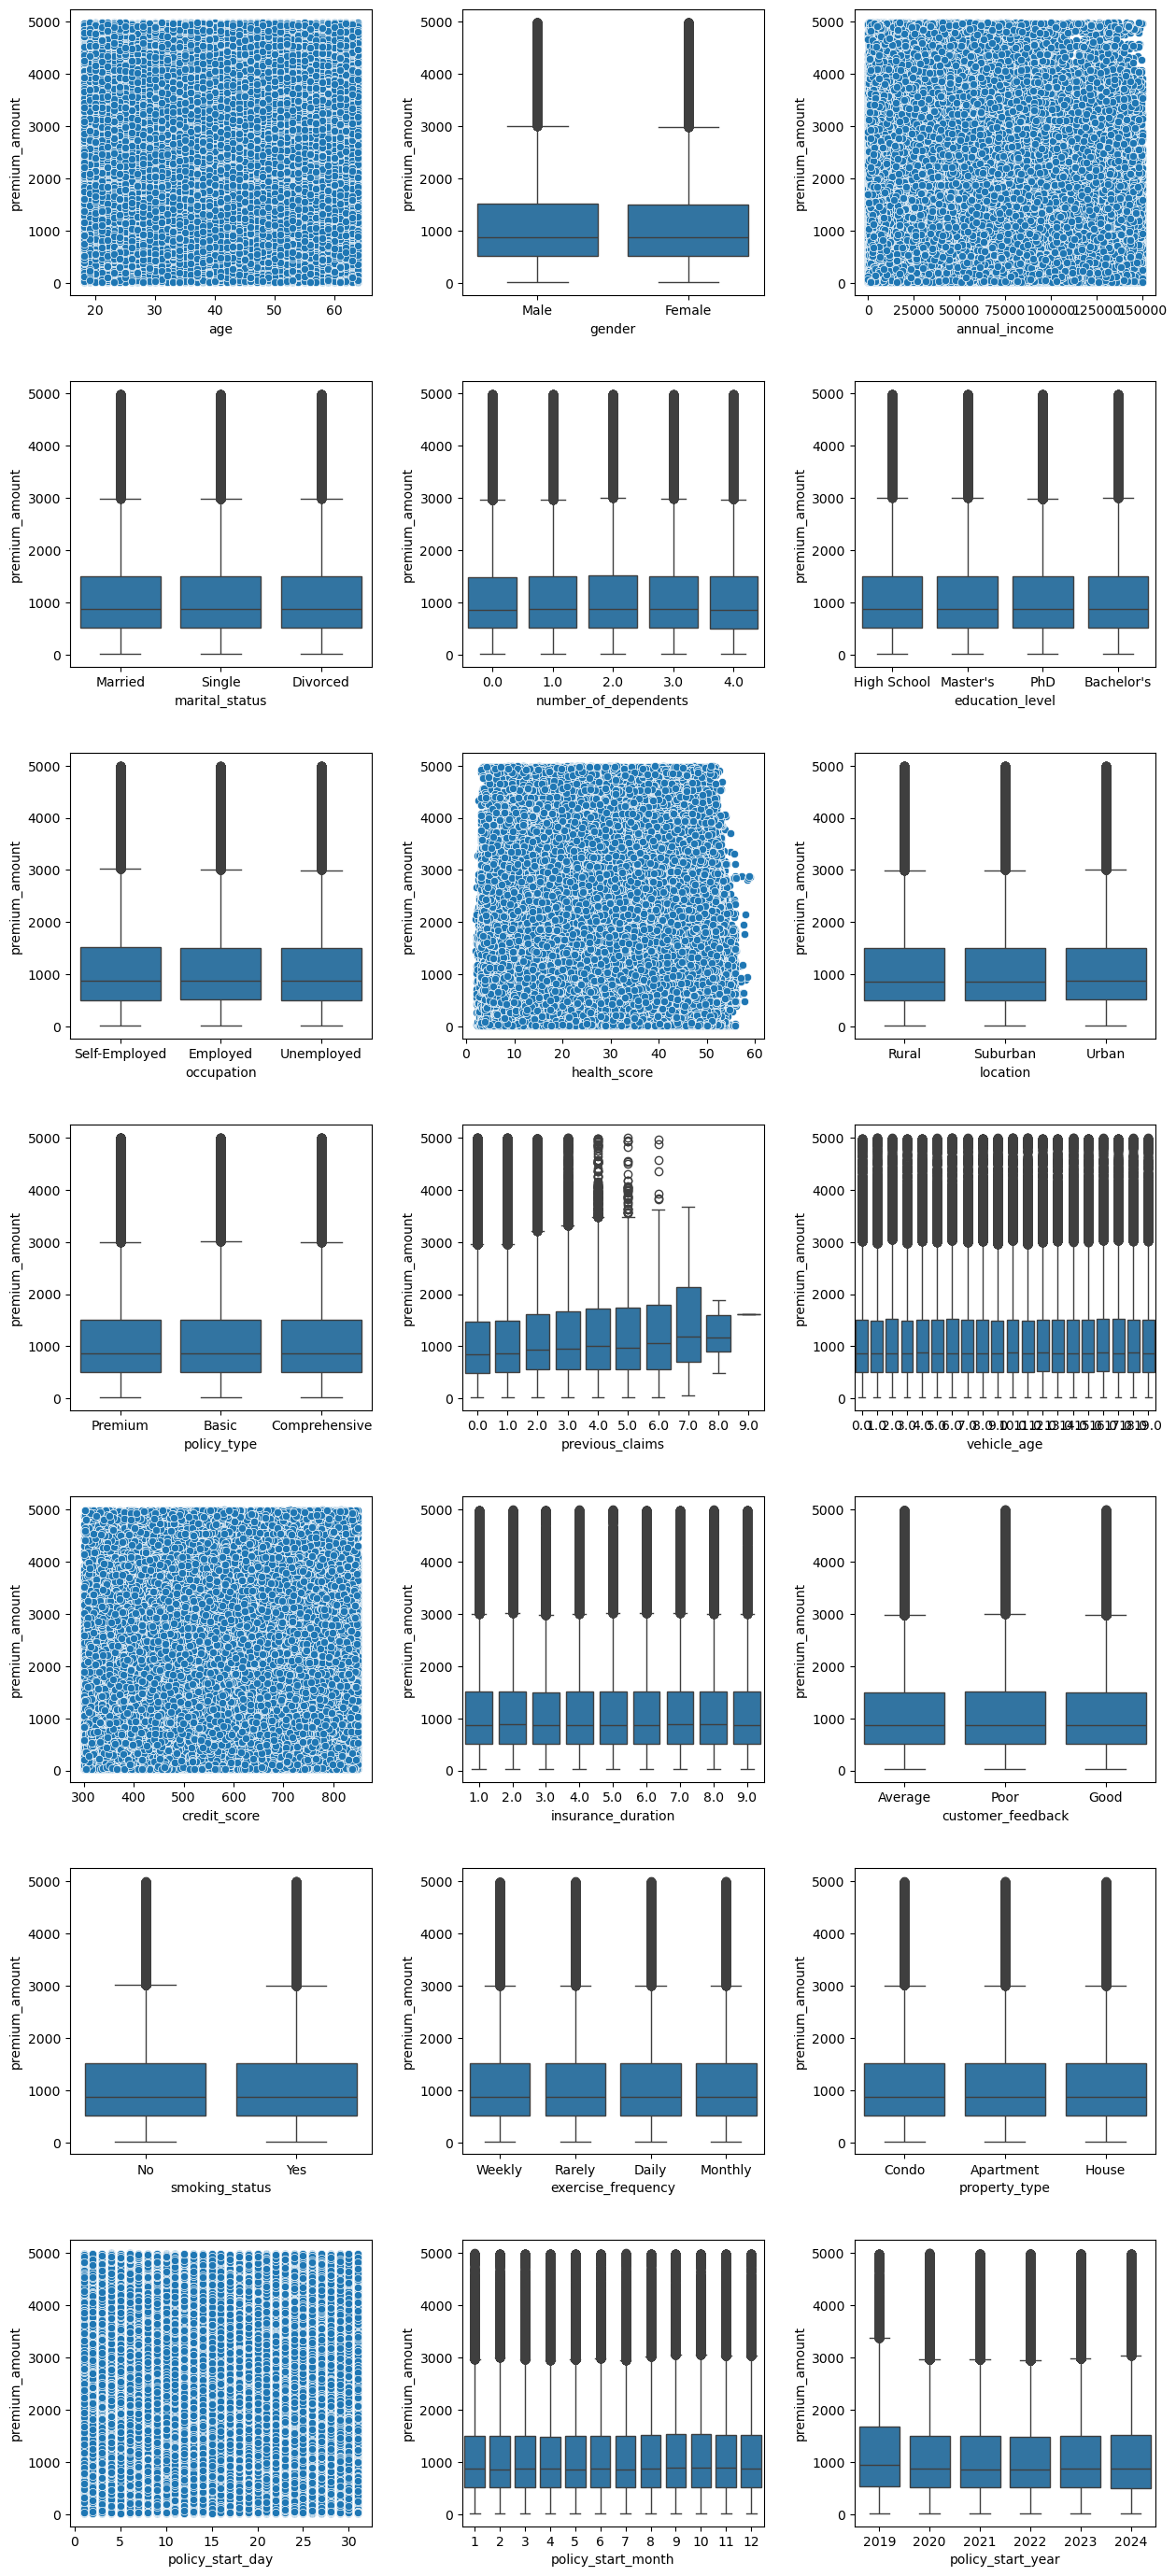

In [82]:
plt.figure(figsize=(15, 35))
for i, num_feat in enumerate(train.columns.drop(['premium_amount', 'id'])):
  plt.subplot(7, 3, i + 1)
  if df[num_feat].nunique() < 21:
    sns.boxplot(data=train, x=f'{num_feat}', y='premium_amount')
  else:
    sns.scatterplot(data=train, x=f'{num_feat}', y='premium_amount')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Analyzing distribution of Feature

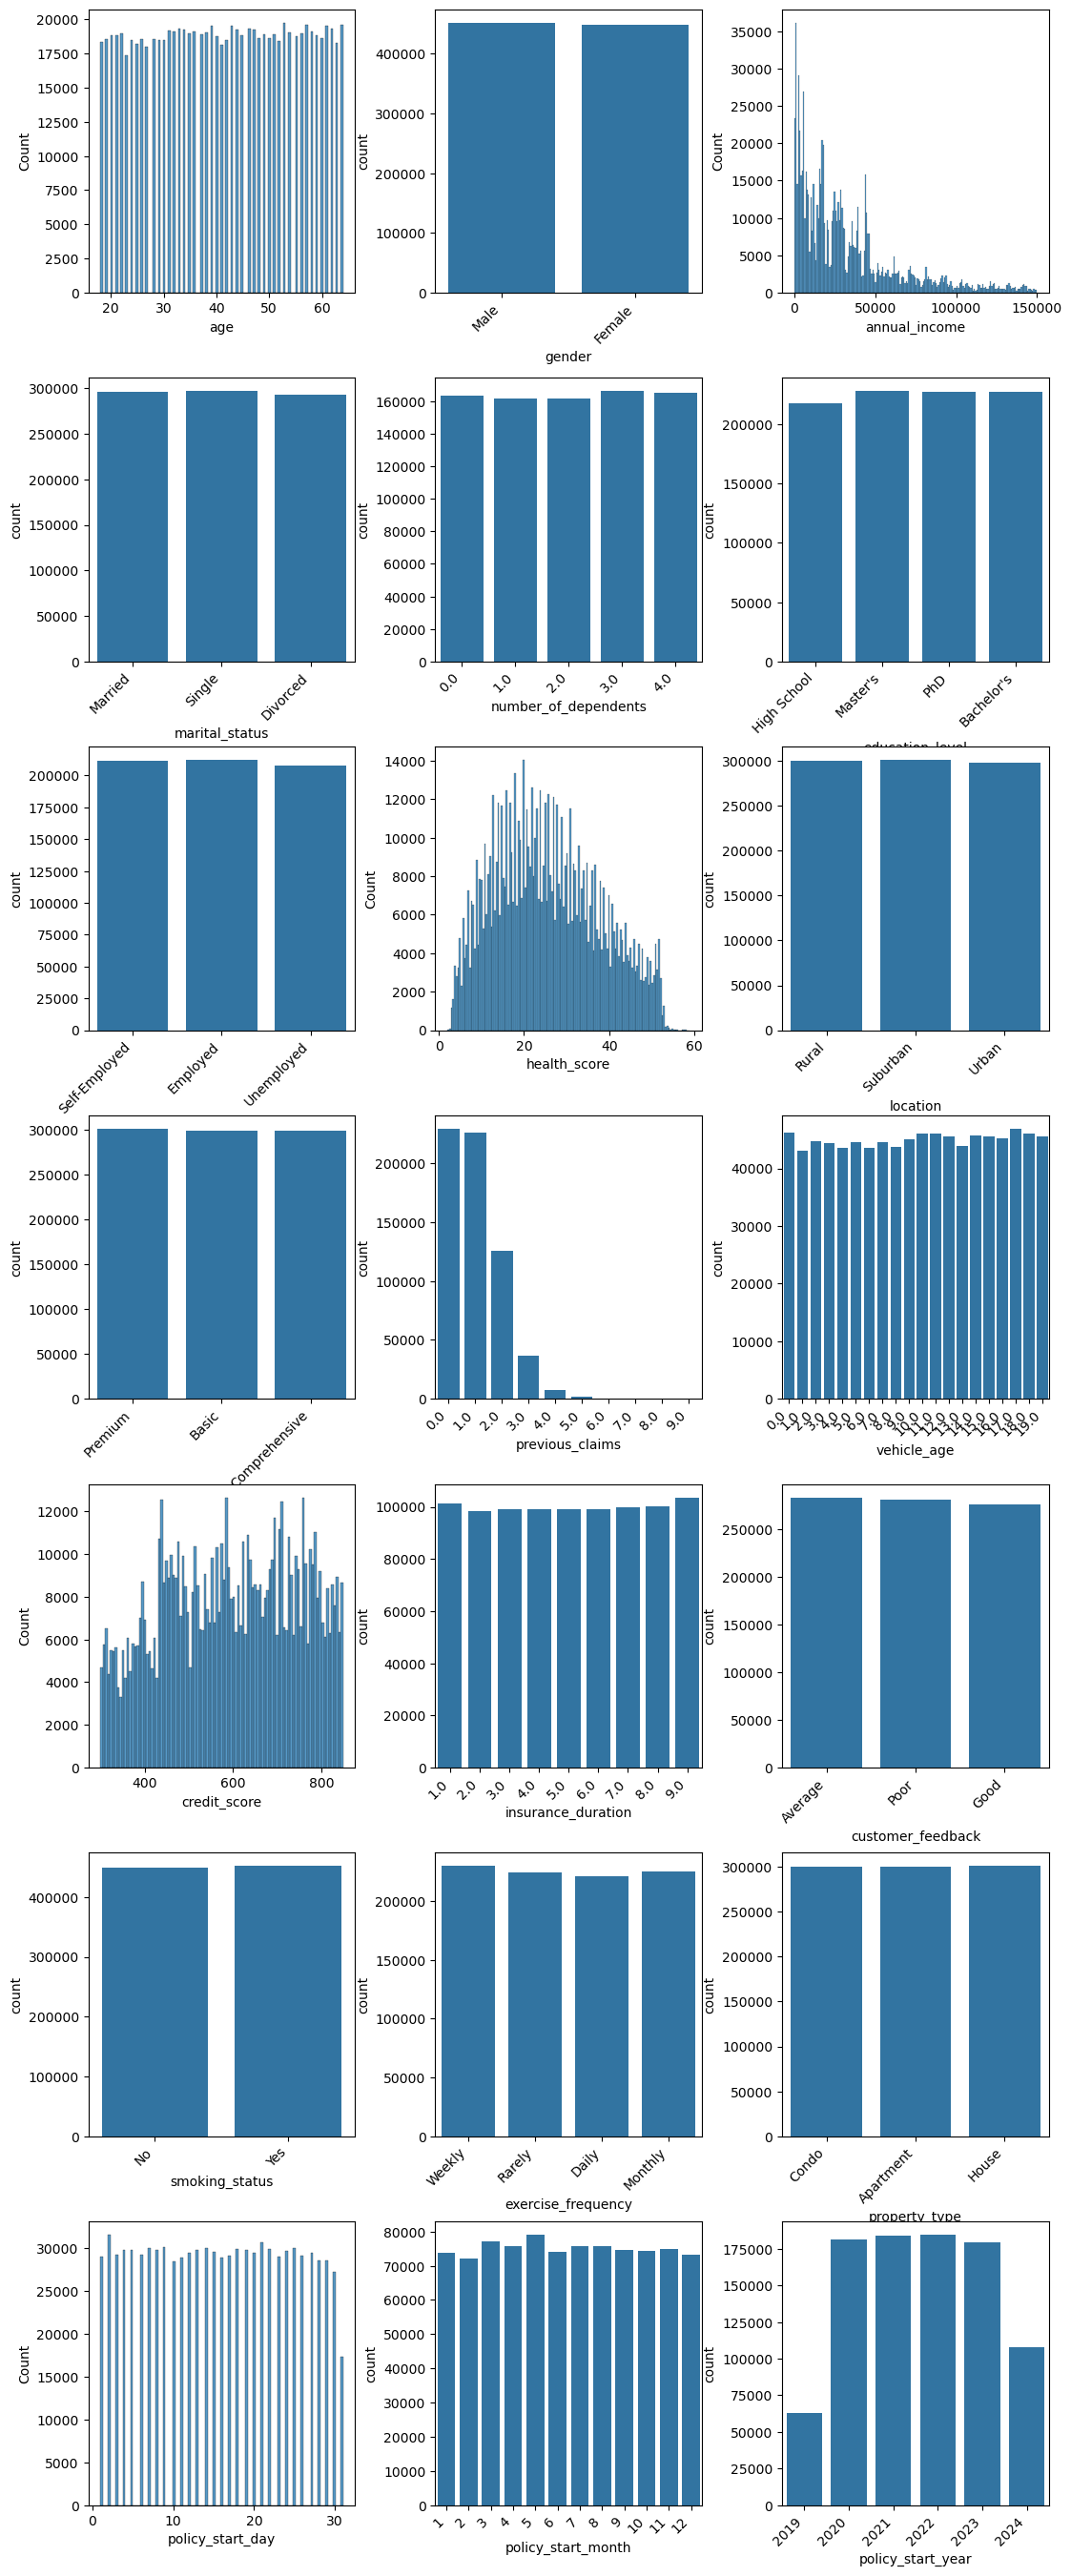

In [27]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(13, 34))
for i, num_feat in enumerate(train.columns.drop(['premium_amount', 'id'])):
  plt.subplot(7, 3, i + 1)
  if df[num_feat].nunique() < 21:
    ax = sns.countplot(data=train, x=f'{num_feat}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
  else:
    ax = sns.histplot(data=train, x=f"{num_feat}")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
plt.close()